In [1]:
pip install yfinance --user

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

google = yf.Ticker("GOOG")

In [3]:
df = google.history(period='1d', interval="1m")
print(df.head())

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-05-03 09:30:00-04:00  168.949997  168.949997  168.949997  168.949997   
2024-05-03 09:31:00-04:00  168.990005  169.559998  168.970001  169.220001   
2024-05-03 09:32:00-04:00  169.240005  169.509995  169.190002  169.270004   
2024-05-03 09:33:00-04:00  169.250000  169.559998  168.850006  168.929993   
2024-05-03 09:34:00-04:00  168.929993  169.059998  168.520004  168.520004   

                           Volume  Dividends  Stock Splits  
Datetime                                                    
2024-05-03 09:30:00-04:00  949167        0.0           0.0  
2024-05-03 09:31:00-04:00  144105        0.0           0.0  
2024-05-03 09:32:00-04:00  100702        0.0           0.0  
2024-05-03 09:33:00-04:00   86451        0.0           0.0  
2024-05-03 09:34:00-04:00   74332        0.0           0.0  


In [4]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-05-03 09:30:00-04:00,168.949997,168.949997,168.949997,168.949997,949167,0.0,0.0
2024-05-03 09:31:00-04:00,168.990005,169.559998,168.970001,169.220001,144105,0.0,0.0
2024-05-03 09:32:00-04:00,169.240005,169.509995,169.190002,169.270004,100702,0.0,0.0
2024-05-03 09:33:00-04:00,169.250000,169.559998,168.850006,168.929993,86451,0.0,0.0
2024-05-03 09:34:00-04:00,168.929993,169.059998,168.520004,168.520004,74332,0.0,0.0


In [5]:
df = google.history(period='1d', interval="1m")
df = df[['Close', 'Low']]
df.head()

,Close,Low
Datetime,,
2024-05-03 09:30:00-04:00,168.949997,168.949997
2024-05-03 09:31:00-04:00,169.220001,168.970001
2024-05-03 09:32:00-04:00,169.270004,169.190002
2024-05-03 09:33:00-04:00,168.929993,168.850006
2024-05-03 09:34:00-04:00,168.520004,168.520004


In [6]:
df['date'] = pd.to_datetime(df.index).time
df.set_index('date', inplace=True)
df.head()

,Close,Low
date,,
09:30:00,168.949997,168.949997
09:31:00,169.220001,168.970001
09:32:00,169.270004,169.190002
09:33:00,168.929993,168.850006
09:34:00,168.520004,168.520004


In [7]:
X = df.index.values
y = df['Low'].values
# The split point is the 10% of the dataframe length
offset = int(0.10*len(df))
X_train = X[:-offset]
y_train = y[:-offset]
X_test  = X[-offset:]
y_test  = y[-offset:]

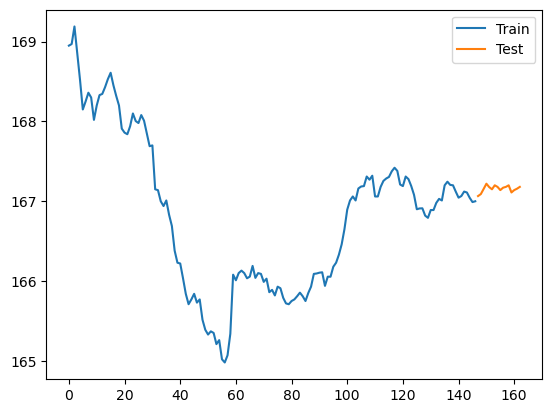

In [8]:
plt.plot(range(0,len(y_train)),y_train, label='Train')
plt.plot(range(len(y_train),len(y)),y_test,label='Test')
plt.legend()
plt.show()

In [9]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression


def load_data():
    X = [[1, 2], [3, 4], [5, 6]]
    y = [0, 1, 0]
    return X, y


import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
# Load your data
X, y = load_data()

# Create a logistic regression model
model = LogisticRegression()

# Fit the model
with warnings.catch_warnings():
    warnings.filterwarnings("error", category=ConvergenceWarning)
    try:
        model.fit(X, y)
    except ConvergenceWarning:
        print("ConvergenceWarning: Maximum number of iterations exceeded")
# Evaluate the model
score = model.score(X, y)
print("Model score:", score)


Model score: 0.6666666666666666


In [10]:
last_close_price = df['Close'].iloc[-1]
forecast = last_close_price


In [11]:
print("-------- Sura Belhekar-43 --------")
print(f'Real data for time 0: {y_train[len(y_train)-1]}')
print(f'Real data for time 1: {y_test[0]}')
print(f'Real data for time 1: {forecast}')

-------- Sura Belhekar-43 --------
Real data for time 0: 167.0
Real data for time 1: 167.06500244140625
Real data for time 1: 167.17999267578125
